# Первичный отсмотр данных

#### Описание датасета:
1) school — аббревиатура школы, в которой учится ученик

2) sex — пол ученика ('F' - женский, 'M' - мужской)

3) age — возраст ученика (от 15 до 22)

4) address — тип адреса ученика ('U' - городской, 'R' - за городом)

5) famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6) Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7) Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8) Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9) Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10) Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11) reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12) guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13) traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14) studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15) failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16) schoolsup — дополнительная образовательная поддержка (yes или no)

17) famsup — семейная образовательная поддержка (yes или no)

18) paid — дополнительные платные занятия по математике (yes или no)

19) activities — дополнительные внеучебные занятия (yes или no)

20) nursery — посещал детский сад (yes или no)

21) higher — хочет получить высшее образование (yes или no)

22) internet — наличие интернета дома (yes или no)

23) romantic — в романтических отношениях (yes или no)

24) famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25) freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26) goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27) health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28) absences — количество пропущенных занятий

29) score — баллы по госэкзамену по математике



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import math 

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

#### Первичные выводы из взгляда на данные: 
- 395 строк   
- 30 колонок
- Видно что есть пропуски данных 
- Тип object следует заменить 

## Посчитаем количество пустых строк для каждого столбца в дасасете

In [2]:
NaN_Sum = lambda col: col.isnull().sum()  # Функция для определения количества нулевых знчений  
columns = list(stud.columns)
for col in columns:
    print("Количество пустых значений", col, NaN_Sum(stud[col]), sep=' ')

Количество пустых значений school 0
Количество пустых значений sex 0
Количество пустых значений age 0
Количество пустых значений address 17
Количество пустых значений famsize 27
Количество пустых значений Pstatus 45
Количество пустых значений Medu 3
Количество пустых значений Fedu 24
Количество пустых значений Mjob 19
Количество пустых значений Fjob 36
Количество пустых значений reason 17
Количество пустых значений guardian 31
Количество пустых значений traveltime 28
Количество пустых значений studytime 7
Количество пустых значений failures 22
Количество пустых значений schoolsup 9
Количество пустых значений famsup 39
Количество пустых значений paid 40
Количество пустых значений activities 14
Количество пустых значений nursery 16
Количество пустых значений studytime, granular 7
Количество пустых значений higher 20
Количество пустых значений internet 34
Количество пустых значений romantic 31
Количество пустых значений famrel 27
Количество пустых значений freetime 11
Количество пустых зн

## Поиск и фильтрация выбросов 

Проверим на выбросы только те столбцы которые содержат численную информацию 

In [3]:
num_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel',
               'freetime', 'goout', 'health', 'absences', 'score']

### Age

age 25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

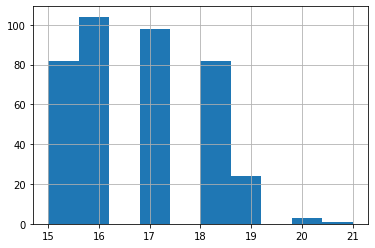

In [4]:
median = stud[num_columns[0]].median()
IQR = stud[num_columns[0]].quantile(0.75) - stud[num_columns[0]].quantile(0.25)
perc25 = stud[num_columns[0]].quantile(0.25)
perc75 = stud[num_columns[0]].quantile(0.75)
print(num_columns[0], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[0]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[0]].hist()
stud[num_columns[0]].describe()

### Medu

Medu 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

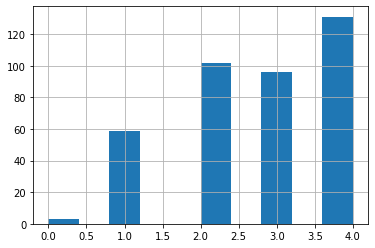

In [5]:
median = stud[num_columns[1]].median()
IQR = stud[num_columns[1]].quantile(0.75) - stud[num_columns[1]].quantile(0.25)
perc25 = stud[num_columns[1]].quantile(0.25)
perc75 = stud[num_columns[1]].quantile(0.75)
print(num_columns[1], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[1]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[1]].hist()
stud[num_columns[1]].describe()

### Fedu

Fedu 25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


count    364.000000
mean       2.535714
std        1.073774
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

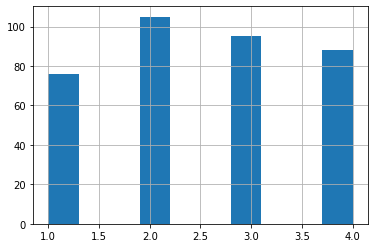

In [6]:
median = stud[num_columns[2]].median()
IQR = stud[num_columns[2]].quantile(0.75) - stud[num_columns[2]].quantile(0.25)
perc25 = stud[num_columns[2]].quantile(0.25)
perc75 = stud[num_columns[2]].quantile(0.75)
print(num_columns[2], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[2]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[2]].hist()
stud[num_columns[2]].describe()

### Traveltime

traveltime 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


count    332.000000
mean       1.397590
std        0.605908
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64

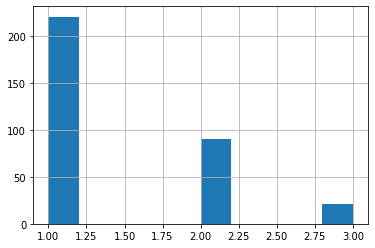

In [7]:
median = stud[num_columns[3]].median()
IQR = stud[num_columns[3]].quantile(0.75) - stud[num_columns[3]].quantile(0.25)
perc25 = stud[num_columns[3]].quantile(0.25)
perc75 = stud[num_columns[3]].quantile(0.75)
print(num_columns[3], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[3]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[3]].hist()
stud[num_columns[3]].describe()

### Studytime

studytime 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


count    304.000000
mean       1.888158
std        0.670445
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64

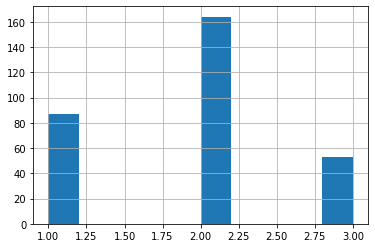

In [8]:
median = stud[num_columns[4]].median()
IQR = stud[num_columns[4]].quantile(0.75) - stud[num_columns[4]].quantile(0.25)
perc25 = stud[num_columns[4]].quantile(0.25)
perc75 = stud[num_columns[4]].quantile(0.75)
print(num_columns[4], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[4]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[4]].hist()
stud[num_columns[4]].describe()

### Failures

failures 25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


count    228.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: failures, dtype: float64

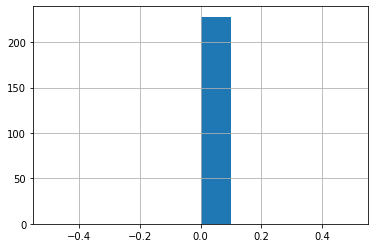

In [9]:
median = stud[num_columns[5]].median()
IQR = stud[num_columns[5]].quantile(0.75) - stud[num_columns[5]].quantile(0.25)
perc25 = stud[num_columns[5]].quantile(0.25)
perc75 = stud[num_columns[5]].quantile(0.75)
print(num_columns[5], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[5]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[5]].hist()
stud[num_columns[5]].describe()

### Studytime, Granular

studytime, granular 25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


count    228.000000
mean      -5.750000
std        1.985354
min       -9.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

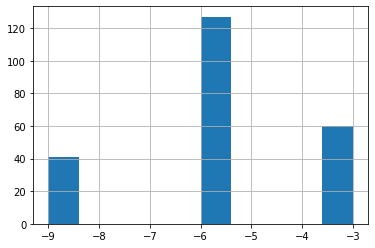

In [10]:
median = stud[num_columns[6]].median()
IQR = stud[num_columns[6]].quantile(0.75) - stud[num_columns[6]].quantile(0.25)
perc25 = stud[num_columns[6]].quantile(0.25)
perc75 = stud[num_columns[6]].quantile(0.75)
print(num_columns[6], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[6]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[6]].hist()
stud[num_columns[6]].describe()

### Famrel

famrel 25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


count    159.000000
mean       4.333333
std        0.472894
min        4.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

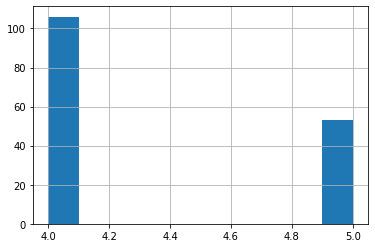

In [11]:
median = stud[num_columns[7]].median()
IQR = stud[num_columns[7]].quantile(0.75) - stud[num_columns[7]].quantile(0.25)
perc25 = stud[num_columns[7]].quantile(0.25)
perc75 = stud[num_columns[7]].quantile(0.75)
print(num_columns[7], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[7]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[7]].hist()
stud[num_columns[7]].describe()

### Freetime

freetime 25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


count    148.000000
mean       3.351351
std        0.806984
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

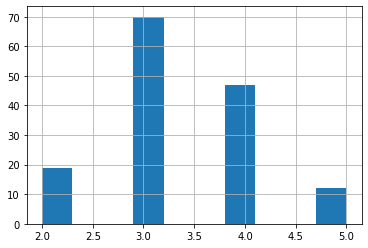

In [12]:
median = stud[num_columns[8]].median()
IQR = stud[num_columns[8]].quantile(0.75) - stud[num_columns[8]].quantile(0.25)
perc25 = stud[num_columns[8]].quantile(0.25)
perc75 = stud[num_columns[8]].quantile(0.75)
print(num_columns[8], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[8]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[8]].hist()
stud[num_columns[8]].describe()

### Goout

goout 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


count    146.000000
mean       3.123288
std        1.056281
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

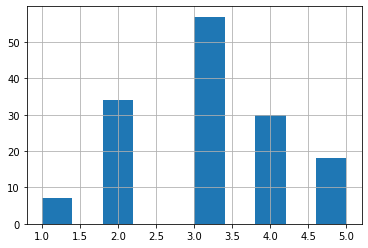

In [13]:
median = stud[num_columns[9]].median()
IQR = stud[num_columns[9]].quantile(0.75) - stud[num_columns[9]].quantile(0.25)
perc25 = stud[num_columns[9]].quantile(0.25)
perc75 = stud[num_columns[9]].quantile(0.75)
print(num_columns[9], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[9]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[9]].hist()
stud[num_columns[9]].describe()

### Health

health 25-й перцентиль: 2.0, 75-й перцентиль: 5.0, IQR: 3.0,  Границы выбросов: [-2.5, 9.5].


count    141.000000
mean       3.411348
std        1.424635
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

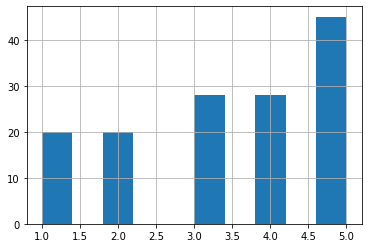

In [14]:
median = stud[num_columns[10]].median()
IQR = stud[num_columns[10]].quantile(0.75) - stud[num_columns[10]].quantile(0.25)
perc25 = stud[num_columns[10]].quantile(0.25)
perc75 = stud[num_columns[10]].quantile(0.75)
print(num_columns[10], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[10]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[10]].hist()
stud[num_columns[10]].describe()

### Absences

absences 25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


count    128.000000
mean       3.539062
std        3.692730
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       14.000000
Name: absences, dtype: float64

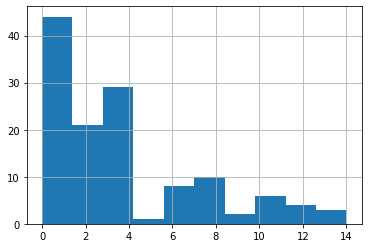

In [15]:
median = stud[num_columns[11]].median()
IQR = stud[num_columns[11]].quantile(0.75) - stud[num_columns[11]].quantile(0.25)
perc25 = stud[num_columns[11]].quantile(0.25)
perc75 = stud[num_columns[11]].quantile(0.75)
print(num_columns[11], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[11]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[11]].hist()
stud[num_columns[11]].describe()

### Score

score 25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


count    120.000000
mean      58.666667
std       15.031247
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

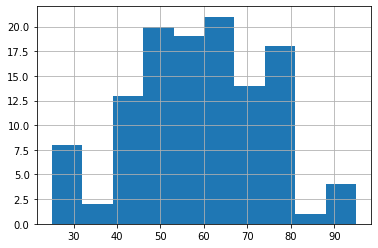

In [16]:
median = stud[num_columns[12]].median()
IQR = stud[num_columns[12]].quantile(0.75) - stud[num_columns[12]].quantile(0.25)
perc25 = stud[num_columns[12]].quantile(0.25)
perc75 = stud[num_columns[12]].quantile(0.75)
print(num_columns[12], '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR, l=perc75 + 1.5 * IQR))
stud = stud.loc[stud[num_columns[12]].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
stud[num_columns[12]].hist()
stud[num_columns[12]].describe()

## Построение гистограмм распределения 

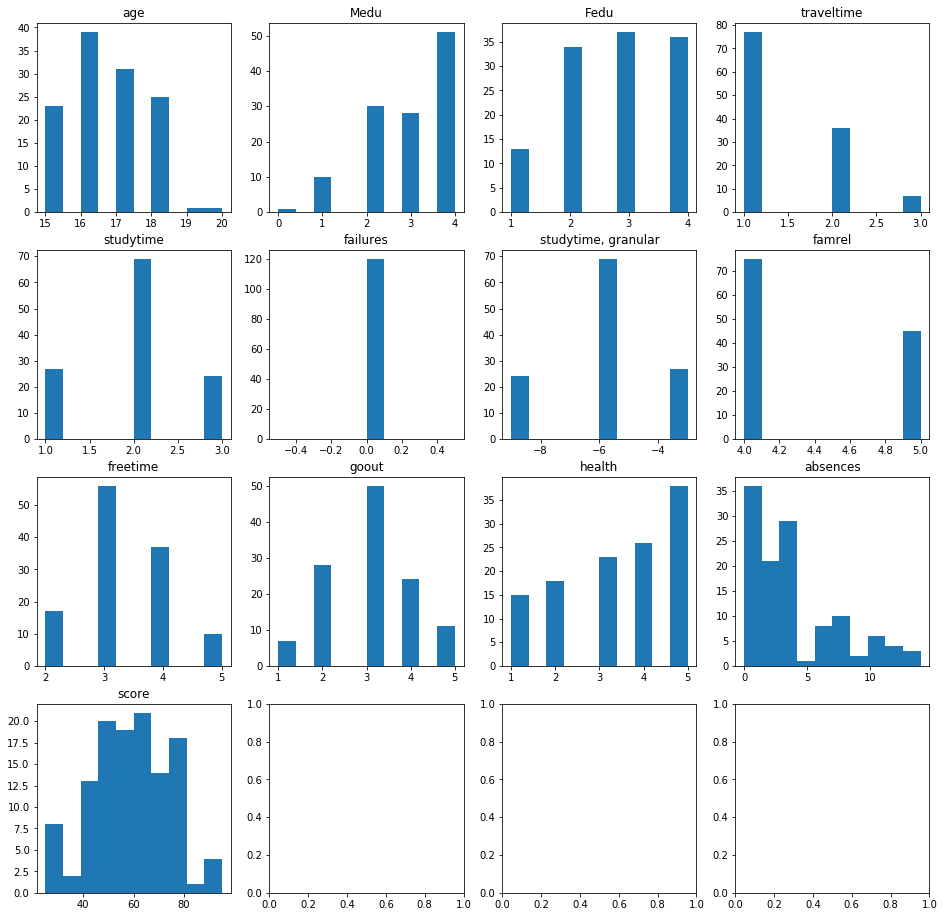

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
step=0
for i in range(4):
    for j in range(4):
        axes[i][j].hist(stud[num_columns[step]])
        axes[i][j].set_title(num_columns[step])
        step+=1
        if step==13:
            break

# Корреляционный анализ

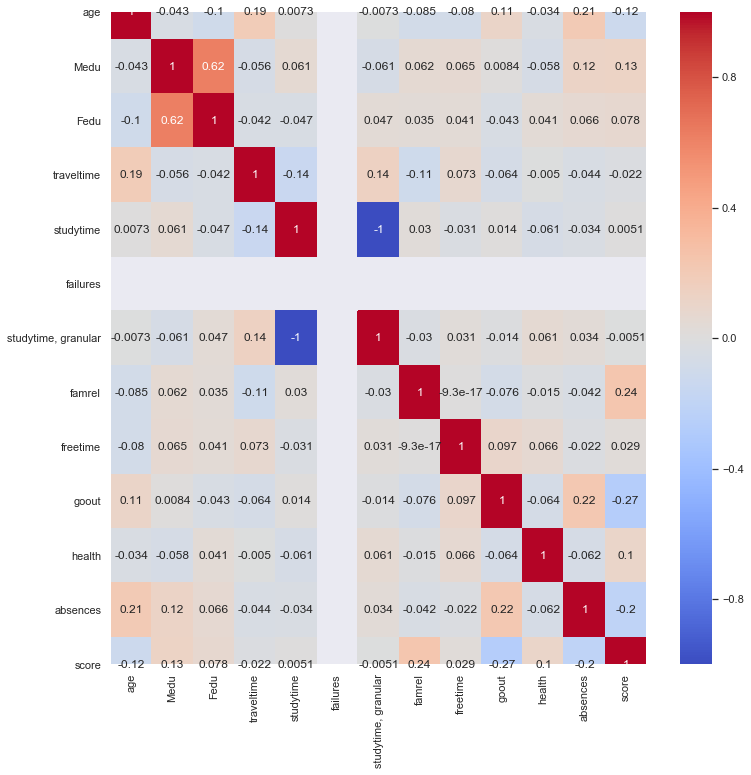

In [49]:
correlation = stud.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

Из графика что выше можно сделать выводы что наиболее связанные параметры это 
#### Fedu and Medu
Средней зависимостью(>0.1) обладают: 
##### age and traveltime
##### age and absences
##### score and famrel
##### goout and absences
##### goout and age 
##### absences and Medu
##### score and Medu
##### studytime and traveltime
Все остальные параметры имеют малую корреляцию и не связаны между собой

## Проведем анализ всех признаков по итоговому экзамену 

In [79]:
#num_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel',
             #  'freetime', 'goout', 'health', 'absences', 'score']

### Age

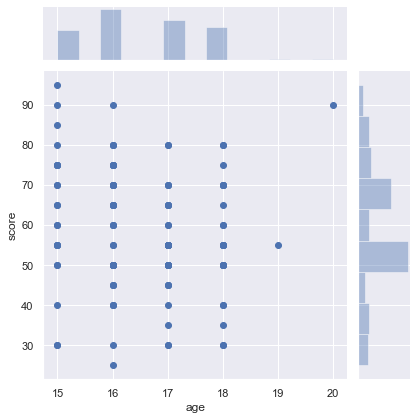

In [81]:
sns.jointplot(x='age',y='score',data=stud)

### Medu

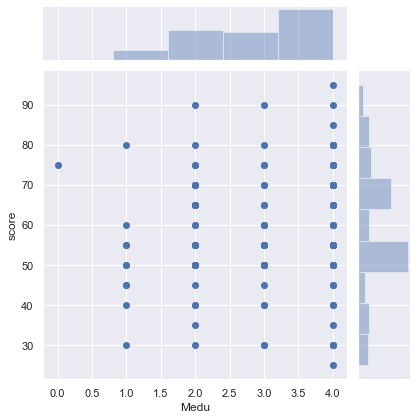

In [82]:
sns.jointplot(x='Medu',y='score',data=stud)

### Fedu 

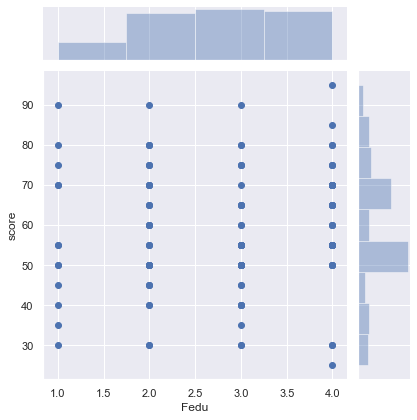

In [83]:
sns.jointplot(x='Fedu',y='score',data=stud)

### Traveltime

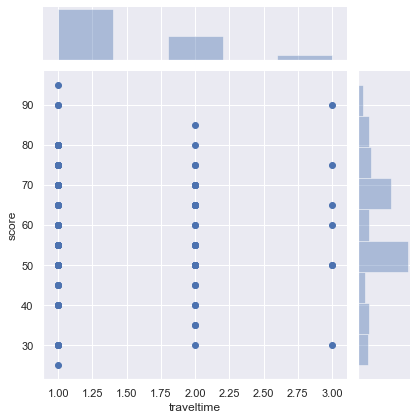

In [84]:
sns.jointplot(x='traveltime',y='score',data=stud)

### Studytime

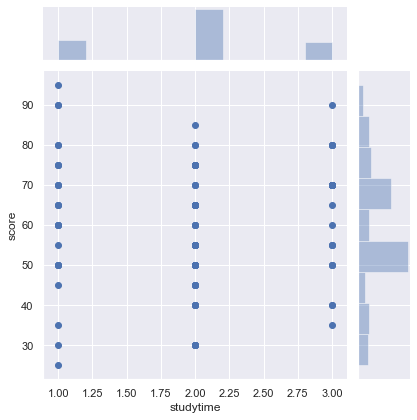

In [85]:
sns.jointplot(x='studytime',y='score',data=stud)

### Failures

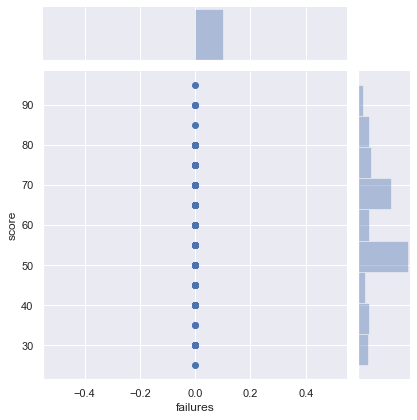

In [86]:
sns.jointplot(x='failures',y='score',data=stud)

### Studytime, granular

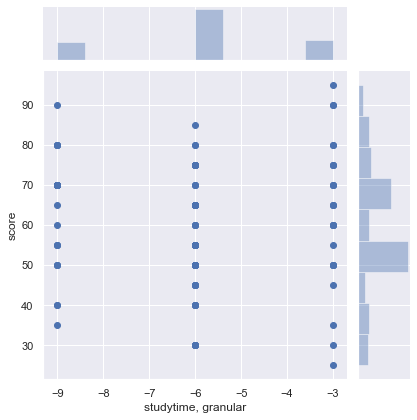

In [87]:
sns.jointplot(x='studytime, granular',y='score',data=stud)

### Famrel

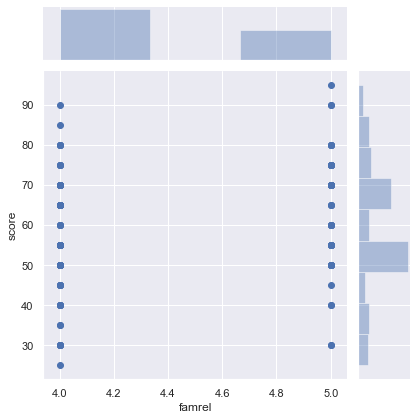

In [88]:
sns.jointplot(x='famrel',y='score',data=stud)

### Freetime

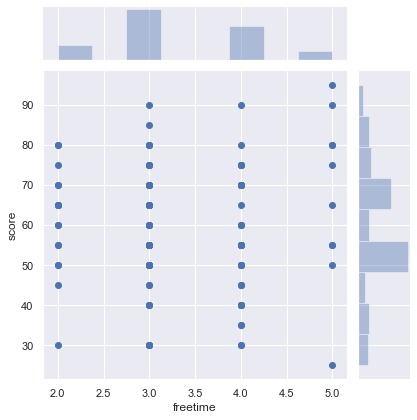

In [89]:
sns.jointplot(x='freetime',y='score',data=stud)

### Goout

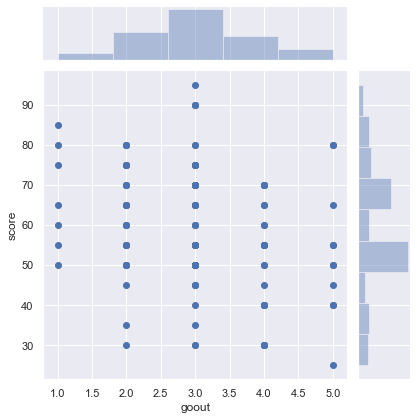

In [90]:
sns.jointplot(x='goout',y='score',data=stud)

### Health

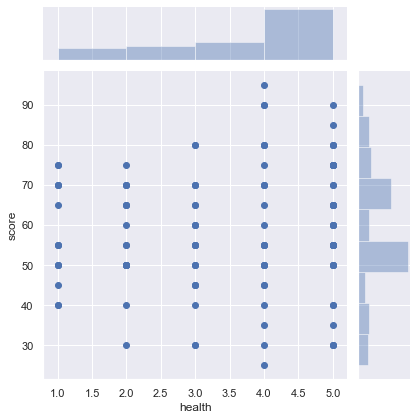

In [91]:
sns.jointplot(x='health',y='score',data=stud)

### Absences

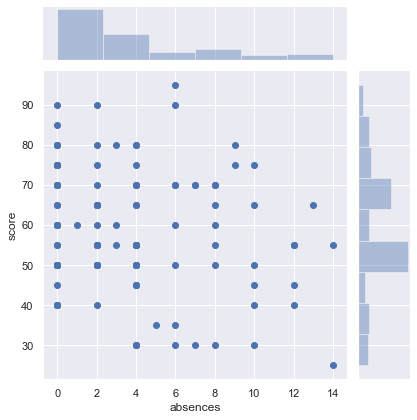

In [92]:
sns.jointplot(x='absences',y='score',data=stud)

#### Из этих графиков можно сделать вывод что данные Failures не нужны и их можно не использовать в будущей модели 

## Анализ номинативных переменных

##### Теперь возьмем все не численные переменные и проведем номинативный анализ 

In [50]:
no_num = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
          'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

## Найдем количество уникальных значений для каждого параметра

In [63]:
UNIQ = lambda data,col: data[col].value_counts()  # Функция для определения количества уникальных значений

In [73]:
for coll in no_num:
    print(coll)
    print(UNIQ(stud,coll))
    print(" ")

school
GP    106
MS     14
Name: school, dtype: int64
 
sex
M    61
F    59
Name: sex, dtype: int64
 
address
U    98
R    19
Name: address, dtype: int64
 
famsize
GT3    76
LE3    39
Name: famsize, dtype: int64
 
Pstatus
T    101
A     11
Name: Pstatus, dtype: int64
 
Mjob
other       43
services    24
teacher     23
at_home     16
health       9
Name: Mjob, dtype: int64
 
Fjob
other       64
services    34
teacher      9
health       4
at_home      4
Name: Fjob, dtype: int64
 
reason
course        46
reputation    29
home          29
other         12
Name: reason, dtype: int64
 
guardian
mother    81
father    22
other      5
Name: guardian, dtype: int64
 
schoolsup
no     102
yes     15
Name: schoolsup, dtype: int64
 
famsup
yes    65
no     42
Name: famsup, dtype: int64
 
paid
no     55
yes    52
Name: paid, dtype: int64
 
activities
yes    62
no     52
Name: activities, dtype: int64
 
nursery
yes    95
no     21
Name: nursery, dtype: int64
 
higher
yes    111
no       3
Name: high

#### Проанализировав все столбцы можно сделать вывод, что в основном мы имеем простые значения по типу (yes/no)

### Теперь проведем анализ на выявление взаимосвязи между score и всеми остальными параметрами

In [77]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

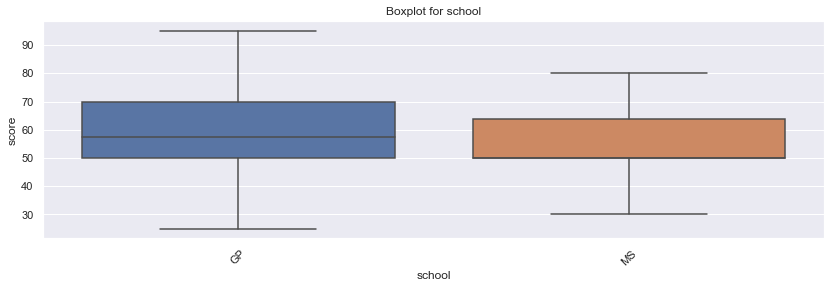

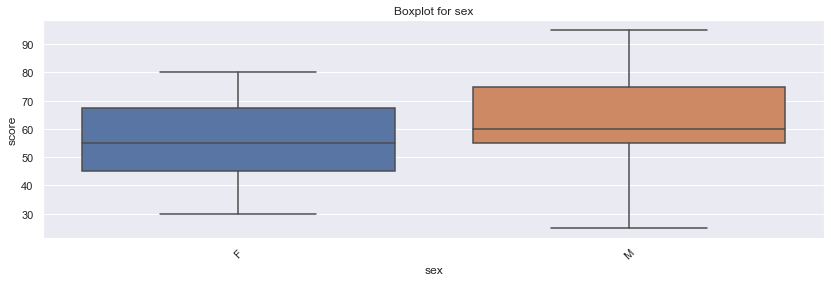

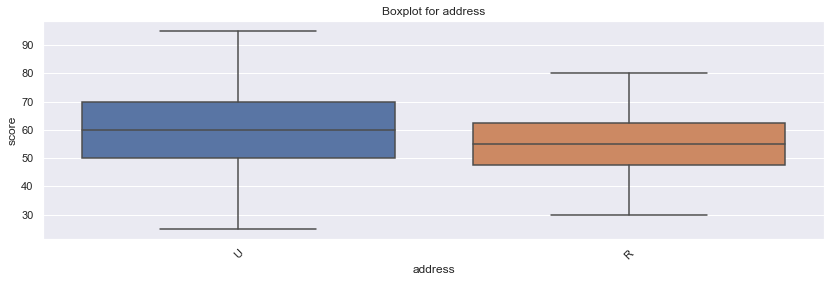

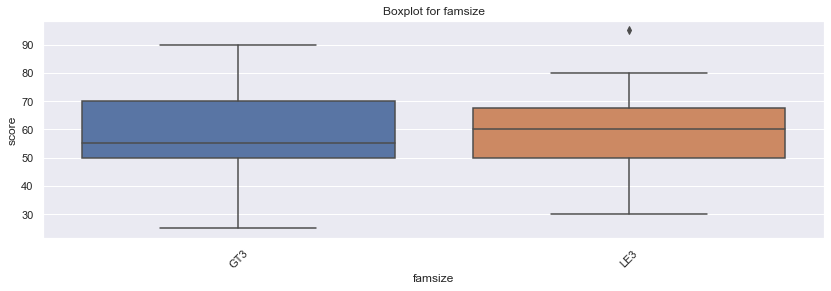

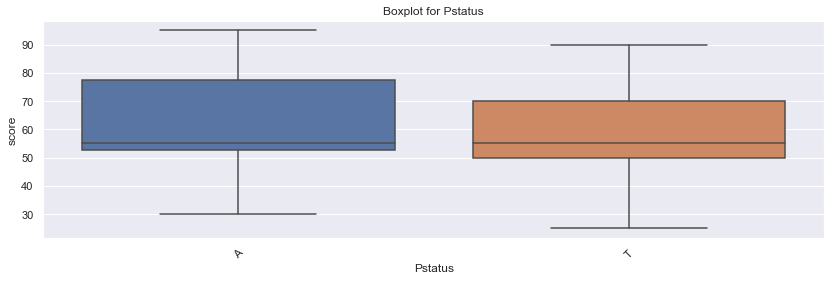

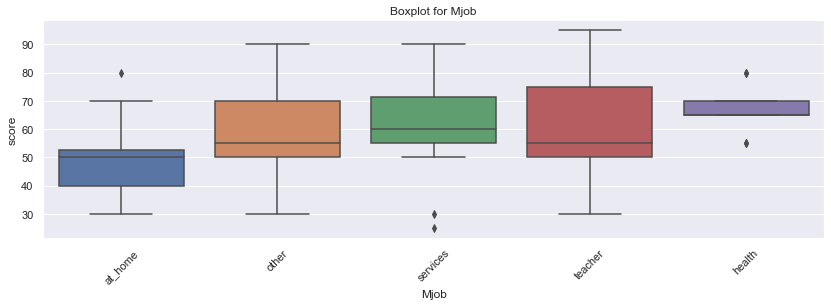

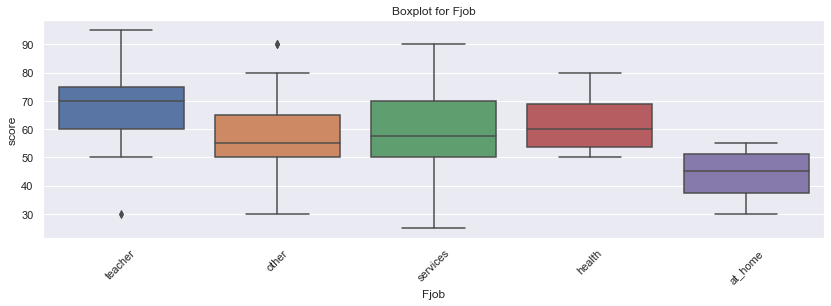

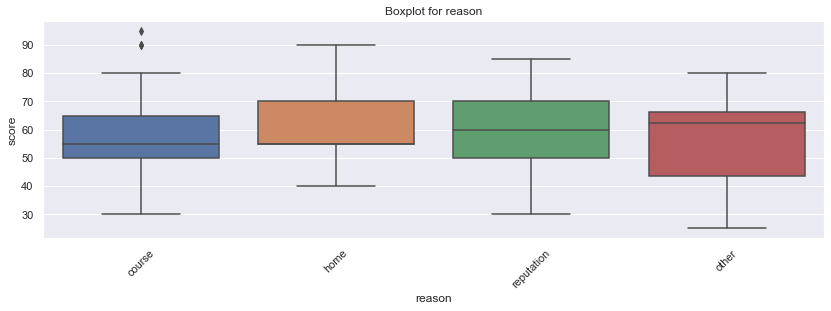

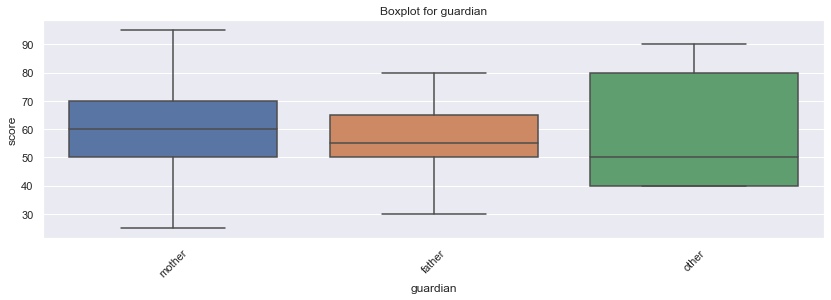

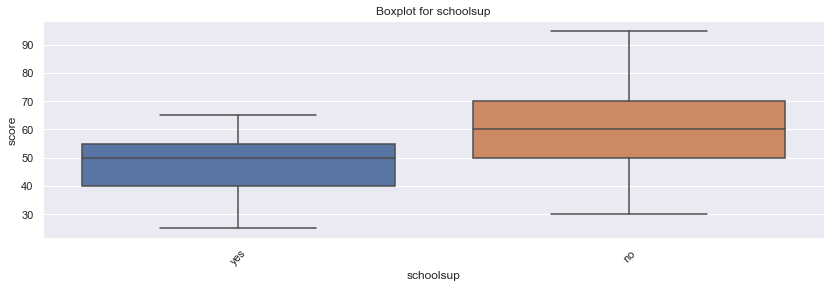

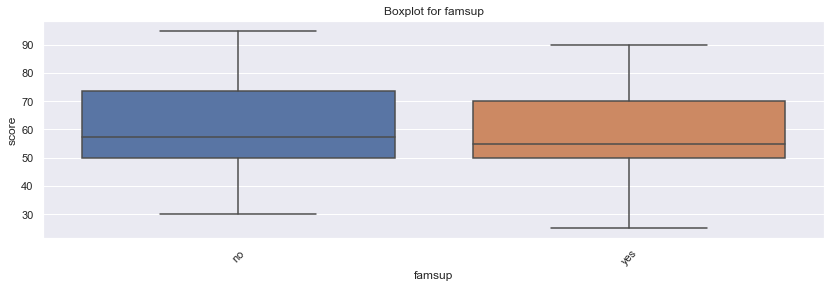

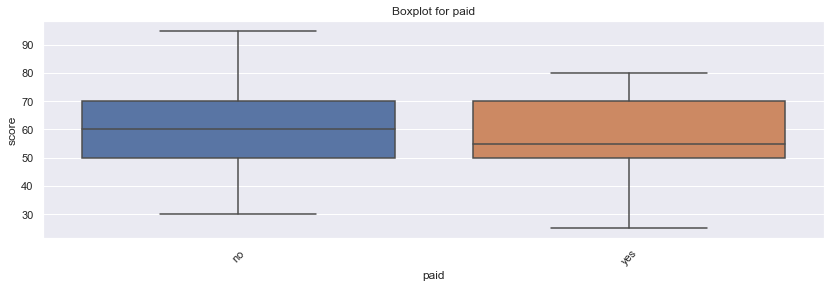

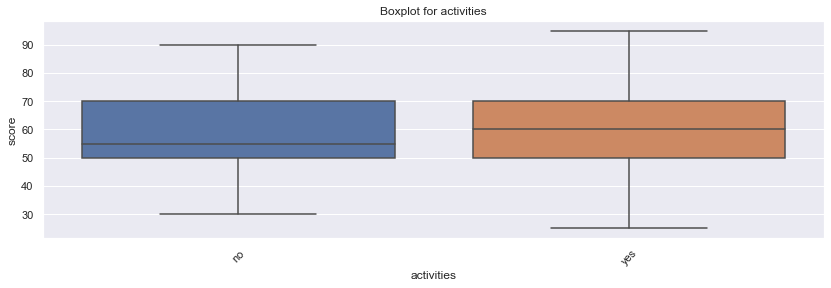

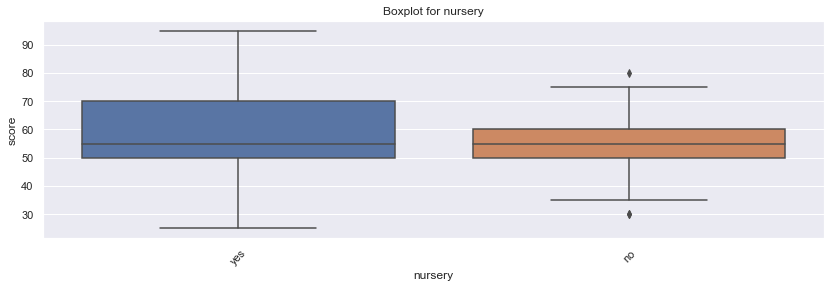

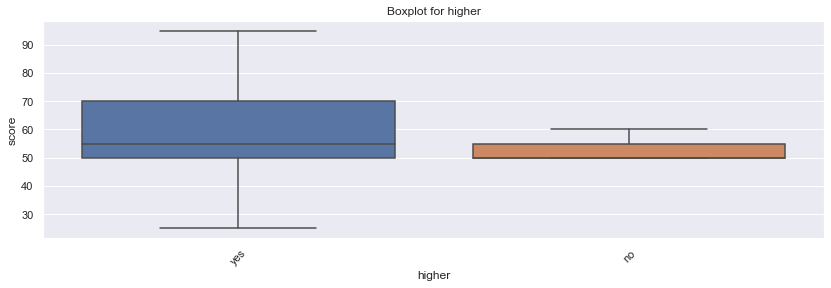

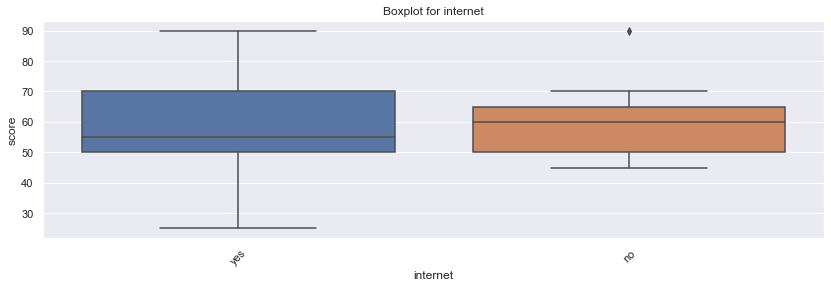

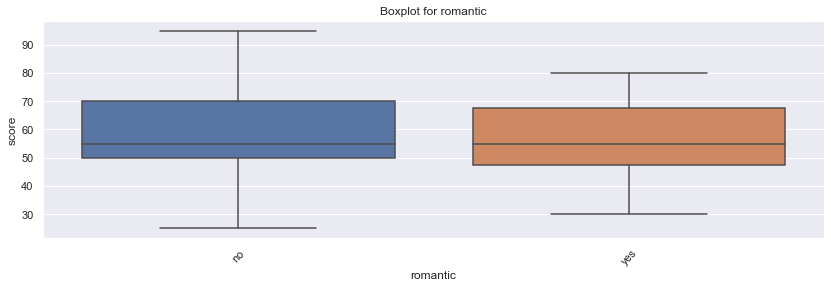

In [78]:
for coll in no_num:
    get_boxplot(coll)

#### Выводы из анализа: 
1) Школа GP имеет более высокие средние паказатели за экзамен (при том что и разброс значений выше) 

2) Мальчики имеют более высокие средние паказатели за экзамен (при том что и разброс значений выше)
3) Адрес U имеет более высокие средние паказатели за экзамен (при том что и разброс значений выше)

4) Дети у который в семье боле 3 человек имеет немного низкие средние паказатели за экзамен (при том что и разброс значений выше)

5) Статус сожития родителей значительно не вляет на показатели экзамена (немного выше в случае А)

6) Дети у которых отцы работают учителями имеют более высокие средние паказатели за экзамен (при том что и разброс значений выше), а дети чье отцы не работают показывают худшие показатели 

7) Дети у которых матери работают учителями имеют более высокие средние паказатели за экзамен (при том что и разброс значений выше), а дети чье матери не работают показывают худшие показатели 

8) Причина выбора школы значительно не влияет на результаты экзамена

9) Дети у которых опекун мать имеет наибольший разброс значений

10) Дети у который нет дополнительной образовательной поддержки сдают итоговый экзамен лучше 

11) Дети у которых есть семейная образовательная поддержка сдают экзамены лучше

12) Дети проходившие платные доп занятия по математике имеют худший результат значений за экзамен

13) Дети проходившие дополнительные занятя имеют незначительно более высокий показатель на экзамене

14) Дети посещавшие детский сад имеют больший разброс значений на экзамене при том что среднее значение не отличается 

15) Дети которые хотят получить высшее образование имеют более высокое значение на экзамене, при том что имеют и более высокий разброс, дети которые не хотят получать высшее сдают экзамены с очень похжими результатами 

16) Дети у который был интернет имеют более высокие средние паказатели за экзамен (при том что и разброс значений выше) 

17) Дети у который были отношения имеют более высокие средние паказатели за экзамен (при том что и разброс значений выше) 